In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 14.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f0ea3b2c0862c906781a0f9d00a0a25e04afff025f40b7bf5fe278dfa2711815
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
pip install HTMLParser

  Created wheel for HTMLParser: filename=HTMLParser-0.0.2-py3-none-any.whl size=5983 sha256=62ea46ad289e5d1f5cc95a2d32aa273496532cb14909c00eee1ff95fc7f4e605
  Stored in directory: /root/.cache/pip/wheels/88/0f/43/11747d95b28379b346c15f935f4d4075e7a4ec068d3a510c79
Successfully built HTMLParser


In [ ]:
pip install transformers==3.0.0

     |████████████████████████████████| 754 kB 15.5 MB/s 
     |████████████████████████████████| 3.0 MB 63.1 MB/s 
     |████████████████████████████████| 1.2 MB 54.9 MB/s 
     |████████████████████████████████| 895 kB 62.2 MB/s 


In [ ]:
#@title read json { form-width: "1px" }
import json

path = "/content/drive/My Drive/5001_Group/"
js = open(path + "Sarcasm_Headlines_Dataset.json")
dataset = []
for line in js.readlines():
  js_line = json.loads(line)
  dataset.append(js_line)

headlines = []
labels = []
for item in dataset:
  headlines.append(item["headline"])
  labels.append(int(item["is_sarcastic"]))

In [ ]:
#@title data cleaning { form-width: "1px" }
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
tokenizer = nltk.RegexpTokenizer(r'w+')
stemmer = PorterStemmer()

headlines_clean = []
for i in range(len(headlines)):
  tmp = headlines[i]
  tmp = re.sub("@\S+", " ", tmp)
  tmp = re.sub("https*\S+", " ", tmp)
  tmp = re.sub("#\S+", " ", tmp)
  tmp = re.sub("\'\w+", '', tmp)
  tmp = re.sub('[%s]' % re.escape(string.punctuation), ' ', tmp)
  tmp = re.sub(r'\w*\d+\w*', '', tmp)
  tmp = re.sub('\s{2,}', " ", tmp)
  words = nltk.word_tokenize(tmp)
  new_words = []
  for word in words:
    # if word not in stop_words:
      if len(word) > 0:
        # new_words.append(stemmer.stem(word).lower())
        new_words.append(word.lower())
  headlines_clean.append(new_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
! wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

--2022-04-26 06:48:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-26 06:48:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-26 06:48:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#@title load dictionary { form-width: "1px" }
import numpy as np

# vocab,embeddings = [],[]
# with open('glove.6B.300d.txt','rt') as fi:
#     full_content = fi.read().strip().split('\n')
# for i in range(len(full_content)):
#     i_word = full_content[i].split(' ')[0]
#     i_embeddings = [float(val) for val in full_content[i].split(' ')[1:]]
#     vocab.append(i_word)
#     embeddings.append(i_embeddings)

# vocab_npa = np.array(vocab)
# embs_npa = np.array(embeddings)

# vocab_npa = np.insert(vocab_npa, 0, '<pad>')
# vocab_npa = np.insert(vocab_npa, 1, '<unk>')
# pad_emb_npa = np.zeros((1,embs_npa.shape[1]))
# unk_emb_npa = np.mean(embs_npa,axis=0,keepdims=True)
# embs_npa = np.vstack((pad_emb_npa,unk_emb_npa,embs_npa))

# with open('/content/drive/My Drive/5001_Group/vocab_npa.npy','wb') as f:
#     np.save(f,vocab_npa)
# with open('/content/drive/My Drive/5001_Group/embs_npa.npy','wb') as f:
#     np.save(f,embs_npa)

vocab_npa = np.load("/content/drive/My Drive/5001_Group/vocab_npa.npy", allow_pickle=True)
embs_npa = np.load("/content/drive/My Drive/5001_Group/embs_npa.npy", allow_pickle=True)

stopword_ids = []
for stopword in stop_words:
  index = np.where(vocab_npa==stopword)[0]
  if len(index) > 0:
    stopword_ids.append(index[0])

In [ ]:
#@title get embeddings { form-width: "1px" }
# embeddings = []
# input_ids = []
# for i in range(len(headlines_clean)):
#   # embedding = np.zeros((max_seq_length, embs_npa.shape[1]))
#   ids = []
#   for j in range(len(headlines_clean[i])):
#     token = headlines_clean[i][j]
#     index = np.where(vocab_npa==token)[0]
#     if len(index) > 0:
#       index = index[0]
#     else:
#       index = 1
#     ids.append(index)
#   input_ids.append(ids)
#   if int(i%100) == 0:
#     print(i / len(headlines_clean))


# with open('/content/drive/My Drive/5001_Group/input_ids_no_stopwords.npy','wb') as f:
#     np.save(f,np.array(input_ids))

In [ ]:
#@title form dataset { form-width: "1px" }
import torch
from torch.utils.data import Dataset
import numpy as np

class GloveDataset(Dataset):
  def __init__(self, sent_ids, labels, max_seq_len):
    self.sent_ids = sent_ids
    self.labels = labels
    self.max_seq_len = max_seq_len
    self.dataset = self.preprocess(sent_ids, labels)

  def preprocess(self, sent_ids, labels):
    data = []
    for i in range(len(labels)):
        data.append([sent_ids[i], labels[i]])
    return data

  def __getitem__(self, idx):
    ids = self.dataset[idx][0][1]
    sent = self.dataset[idx][0][0]
    label = self.dataset[idx][1]
    item = {}
    while len(ids) < 24:
      ids.append(0)
    ids = ids[:24]
    item['input_ids'] = ids
    item['sent'] = sent
    item["label"] = label
    return item

  def __len__(self):
    return len(self.dataset)
  
  def collate_fn(self, batch):
    input_ids = [x["input_ids"] for x in batch]
    labels = [x["label"] for x in batch]
    sents = [x["sent"] for x in batch]

    batch_len = len(input_ids)

    batch_masks = np.full((batch_len, 24, 24), True, dtype=bool)
    for i in range(len(input_ids)):
      for j in range(len(input_ids[i])):
        if (input_ids[i][j] == 0) or (input_ids[i][j] in stopword_ids):
        # if (input_ids[i][j] == 0):
          for k in range(len(input_ids[i])):
            batch_masks[i][k][j] = False
            batch_masks[i][j][k] = False

    batch_data = np.zeros((batch_len, self.max_seq_len))
    batch_labels = np.ones((batch_len))
    for i in range(batch_len):
      cur_len = len(input_ids[i])
      batch_data[i][:cur_len] = input_ids[i]
      batch_labels[i] = labels[i]

    batch_data = torch.tensor(batch_data, dtype=torch.long)
    batch_labels = torch.tensor(batch_labels, dtype=torch.long)
    batch_masks = torch.tensor(batch_masks, dtype=torch.bool)

    return [batch_data, batch_labels, batch_masks, sents]

In [ ]:
#@title Attention { form-width: "1px" }
import math
import torch.nn as nn

def orignal(x):
    return x

class Attention(nn.Module):
  def __init__(self,
        q_embd_size,
        k_embd_size,
        v_embd_size,
        q_k_hidden_size=None,
        output_hidden_size=None,
        num_heads=1,  # for multi-head attention
        score_func='scaled_dot',
        drop_rate=0.,
        is_q=False,  # let q_embd to be q or not,default not
        is_k=False,
        is_v=False,
        bias=True
        ):
    super(Attention, self).__init__()
    if not q_k_hidden_size:
      q_k_hidden_size = q_embd_size
    if not output_hidden_size:
      output_hidden_size = v_embd_size
    assert q_k_hidden_size % num_heads == 0
    self.head_dim = q_k_hidden_size // num_heads
    assert self.head_dim * num_heads == q_k_hidden_size, "q_k_hidden_size must be divisible by num_heads"
    assert output_hidden_size % num_heads == 0, "output_hidden_size must be divisible by num_heads"
    if is_q:
      self.q_w = orignal
      assert q_embd_size == k_embd_size
    else:
      self.q_w = nn.Linear(q_embd_size, q_k_hidden_size,bias=bias)
    self.is_q = is_q
    self.q_embd_size = q_embd_size
    if is_k:
      self.k_w = orignal
      assert k_embd_size == q_k_hidden_size
    else:
      self.k_w = nn.Linear(k_embd_size, q_k_hidden_size,bias=bias)
    if is_v:
      self.v_w = orignal
      assert v_embd_size == output_hidden_size
    else:
      self.v_w = nn.Linear(v_embd_size, output_hidden_size,bias=bias)
    self.q_k_hidden_size = q_k_hidden_size
    self.output_hidden_size = output_hidden_size
    self.num_heads = num_heads
    self.score_func = score_func
    self.drop_rate = drop_rate

  def forward(self, q_embd, k_embd, v_embd, mask=None, attention_out=False):
    if len(q_embd.shape) == 2:
      q_embd = torch.unsqueeze(q_embd, 1)
    if len(k_embd.shape) == 2:
      k_embd = torch.unsqueeze(k_embd, 1)
    if len(v_embd.shape) == 2:
      v_embd = torch.unsqueeze(v_embd, 1)
    batch_size = q_embd.shape[0]
    q_len = q_embd.shape[1]
    k_len = k_embd.shape[1]
    v_len = v_embd.shape[1]
    assert k_len == v_len
    q = self.q_w(q_embd).view(batch_size, q_len, self.num_heads, self.head_dim)
    q = q.permute(2, 0, 1, 3).contiguous().view(-1, q_len, self.head_dim)
    k = self.k_w(k_embd).view(batch_size, k_len, self.num_heads, self.head_dim)
    k = k.permute(2, 0, 1, 3).contiguous().view(-1, k_len, self.head_dim)
    v = self.v_w(v_embd).view(batch_size, v_len, self.num_heads, self.output_hidden_size // self.num_heads)
    v = v.permute(2, 0, 1, 3).contiguous().view(-1, v_len, self.output_hidden_size // self.num_heads)
    if isinstance(self.score_func, str):
      if self.score_func == "dot":
        score = torch.bmm(q, k.permute(0, 2, 1))
      elif self.score_func == "scaled_dot":
        temp = torch.bmm(q, k.permute(0, 2, 1))
        score = torch.div(temp, math.sqrt(self.q_k_hidden_size))
      else:
        raise RuntimeError('invalid score function')
    elif callable(self.score_func):
      try:
        score = self.score_func(q, k)
      except Exception as e:
        print("Exception :", e)
    if mask is not None:
      mask = mask.bool().unsqueeze(1)
      score = score.masked_fill(~mask, -np.inf)

    score = nn.functional.softmax(score, dim=-1)
    score = nn.functional.dropout(score, p=self.drop_rate, training=self.training)

    output = torch.bmm(score, v)
    heads = torch.split(output, batch_size)
    output = torch.cat(heads, -1)
    if attention_out:
      # score = torch.split(score, self.num_heads)
      # score_list = []
      # for i in range(batch_size):
      #   score_list.append(torch.mean(score[i], 0))
      # score = torch.stack(score_list, 0)

      score = torch.split(score, batch_size)
      tmp = score[0]
      for i in range(1, self.num_heads):
        tmp = tmp+score[i]
      score = tmp / 10
      output = (output, score)
    return output

class SelfAttention(Attention):
  def __init__(self, embd_size, num_heads=1, **kwargs):
    q_embd_size = embd_size
    k_embd_size = embd_size
    v_embd_size = embd_size
    super().__init__(q_embd_size, k_embd_size, v_embd_size, num_heads=num_heads, **kwargs)

  def forward(self, embd, mask=None, attention_out=False):
    q_embd = embd
    k_embd = embd
    v_embd = embd
    return super().forward(q_embd, k_embd, v_embd, mask, attention_out)

class Encoder(nn.Module):
  def __init__(self, sentencelen=None, hiddensize=None):
    super(Encoder, self).__init__()
    # self.att = SelfAttention(hiddensize, 10)
    self.att = nn.MultiheadAttention(300, 1, batch_first=True)
    self.ln = torch.nn.LayerNorm([sentencelen,hiddensize],elementwise_affine=False)
    self.dense = nn.Linear(hiddensize,hiddensize)

  def forward(self, x, mask=None, attention_out=False):
    if attention_out:
      att_out, score = self.att(x, x, x, need_weights=True)
      # att_out, score = self.att(x, mask)
    else:
      att_out, _= self.att(x, x, x, need_weights=True)
      # att_out = self.att(x, mask)
    out = self.ln(x + att_out)
    out_dense = self.dense(out)
    out = self.ln(out_dense+out)
    if attention_out:
      return (out, score)
    else:
      return out

In [ ]:
#@title Model { form-width: "1px" }
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F

class LSTM(nn.Module):
  def __init__(self, embs_npa):
    super(LSTM, self).__init__()
    self.num_labels = 2
    self.embed = nn.Embedding.from_pretrained(torch.from_numpy(embs_npa).float())
    self.bilstm = nn.LSTM(
      input_size=300,
      hidden_size=300 // 2,
      batch_first=True,
      num_layers=2,
      dropout=0.5,
      bidirectional=True
    )
    self.classifier = nn.Linear(300, self.num_labels)

  def forward(self, input_ids, labels=None):
    embeddings = self.embed(input_ids)
    lstm_out, (hn, cn) = self.bilstm(embeddings)
    avg_pool = torch.mean(lstm_out, 1)
    # max_pool,_ = torch.max(lstm_out, 1)
    logits = self.classifier(avg_pool)
    outputs = (logits,)

    if labels is not None:
      loss_func = nn.CrossEntropyLoss()
      loss = loss_func(logits.view(-1, 2), labels.view(-1))
      outputs = (loss,) + outputs

    return outputs

class LSTM_ATT(nn.Module):
  def __init__(self, embs_npa):
    super(LSTM_ATT, self).__init__()
    self.num_labels = 2
    self.embed = nn.Embedding.from_pretrained(torch.from_numpy(embs_npa).float())
    self.bilstm = nn.LSTM(
      input_size=300,
      hidden_size=300 // 2,
      batch_first=True,
      num_layers=2,
      dropout=0.5,
      bidirectional=True
    )
    self.encoder1 = Encoder(sentencelen=24, hiddensize=300)
    self.encoder2 = Encoder(sentencelen=24, hiddensize=300)
    self.classifier = nn.Linear(300, self.num_labels)
    # self.classifier = nn.Linear(600, self.num_labels)

  def forward(self, input_ids, labels=None, mask = None, attention_out=False):
    embeddings = self.embed(input_ids)
    
    if not (mask is None):
      mask_list = []
      for i in range(10):
        mask_list.append(mask)
      mask = torch.cat(mask_list, dim=0).to(device)
    # mask = None

    att_out = self.encoder1(embeddings, None)
    if attention_out:
      att_out, score = self.encoder2(embeddings, mask, attention_out)
    else:
      att_out = self.encoder2(embeddings, mask)

    lstm_out, (hn, cn) = self.bilstm(att_out)
    
    avg_pool = torch.mean(lstm_out, 1)
    max_pool,_ = torch.max(lstm_out, 1)
    out = torch.cat([avg_pool, max_pool],1)
    logits = self.classifier(max_pool)
    if attention_out:
      outputs = (logits, score)
    else:
      outputs = (logits, )
    if labels is not None:
      loss_func = nn.CrossEntropyLoss()
      loss = loss_func(logits.view(-1, 2), labels.view(-1))
      outputs = (loss,) + outputs

    return outputs

In [ ]:
#@title train and dev { form-width: "1px" }
import logging
from tqdm import tqdm
from sklearn.metrics import f1_score

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_epoch(train_loader, model, optimizer, scheduler, epoch):
  model.train()
  train_losses = 0
  for idx, batch_samples in enumerate(tqdm(train_loader)):
    batch_ids, batch_labels, batch_masks, batch_sents = batch_samples

    batch_ids = batch_ids.to(device)
    batch_labels = batch_labels.to(device)

    loss = model(batch_ids, labels=batch_labels, mask = batch_masks)
    loss = loss[0]
    train_losses = train_losses + loss.item()
    model.zero_grad()
    loss.backward()
    nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=5)
    optimizer.step()
    scheduler.step()

  train_loss = float(train_losses) / len(train_loader)
  print("Epoch: {}, train loss: {}".format(epoch, train_loss))

def dev_epoch(dev_loader, model, optimizer, scheduler, epoch):
  model.eval()
  dev_losses = 0
  pred_labels = []
  true_labels = []
  for idx, batch_samples in enumerate(tqdm(dev_loader)):
    batch_ids, batch_labels, batch_masks, batch_sents = batch_samples

    batch_ids = batch_ids.to(device)
    batch_labels = batch_labels.to(device)

    batch_output = model(batch_ids, mask = batch_masks)
    batch_output= batch_output[0].detach().cpu().numpy()
    
    batch_labels = batch_labels.to('cpu').numpy()
    pred_labels.extend(np.argmax(batch_output, axis=1))
    true_labels.extend(batch_labels)

  f1 = f1_score(pred_labels, true_labels)
  print("Epoch: {}, f1: {}".format(epoch, f1 * 100))

def train_model(train_loader, dev_loader, model, optimizer, scheduler, epoch_num):
  for epoch in range(1, epoch_num + 1):
    train_epoch(train_loader, model, optimizer, scheduler, epoch)
    dev_epoch(dev_loader, model, optimizer, scheduler, epoch)
  print("Training Finished!")

def test_model(test_loader, model, optimizer, scheduler):
  model.eval()
  pred_labels = []
  true_labels = []
  for idx, batch_samples in enumerate(tqdm(test_loader)):
    batch_ids, batch_labels, batch_masks, batch_sents = batch_samples

    batch_ids = batch_ids.to(device)
    batch_labels = batch_labels.to(device)

    batch_output = model(batch_ids, mask=batch_masks)
    batch_output= batch_output[0].detach().cpu().numpy()
    batch_labels = batch_labels.to('cpu').numpy()
    pred_labels.extend(np.argmax(batch_output, axis=1))
    true_labels.extend(batch_labels)

  f1 = f1_score(pred_labels, true_labels)
  print("test f1: {}".format(f1 * 100))
  return (pred_labels, true_labels)

In [ ]:
#@title load data { form-width: "1px" }
from sklearn.model_selection import train_test_split

input_ids = np.load("/content/drive/My Drive/5001_Group/input_ids_no_stopwords.npy", allow_pickle=True).tolist()

data = []
for i in range(len(input_ids)):
  data.append([headlines[i], input_ids[i]])

X_train, X_rest, y_train, y_rest = train_test_split(data, labels, test_size = 0.3, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size = 2/3, random_state=1)

max_seq_length = 24
training_set = GloveDataset(X_train, y_train, max_seq_length)
dev_set = GloveDataset(X_dev, y_dev, max_seq_length)
test_set = GloveDataset(X_test, y_test, max_seq_length)

In [ ]:
#@title start train { form-width: "1px" }
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers.optimization import get_cosine_schedule_with_warmup, AdamW

train_loader = DataLoader(training_set, batch_size=64, shuffle=False, collate_fn=training_set.collate_fn)
dev_loader = DataLoader(dev_set, batch_size=64, shuffle=False, collate_fn=dev_set.collate_fn)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, collate_fn=test_set.collate_fn)

model = LSTM_ATT(embs_npa)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)
lstm_optimizer = list(model.bilstm.named_parameters())
classifier_optimizer = list(model.classifier.named_parameters())
att1_optimizer = list(model.encoder1.named_parameters())
att2_optimizer = list(model.encoder2.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in lstm_optimizer if not any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.01},
    {'params': [p for n, p in lstm_optimizer if any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.0},
    {'params': [p for n, p in att1_optimizer if not any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.01},
    {'params': [p for n, p in att1_optimizer if any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.0},
    {'params': [p for n, p in att2_optimizer if not any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.01},
    {'params': [p for n, p in att2_optimizer if any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.0},
    {'params': [p for n, p in classifier_optimizer if not any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.01},
    {'params': [p for n, p in classifier_optimizer if any(nd in n for nd in no_decay)],
      'lr': 5e-4, 'weight_decay': 0.0}]

epoch_num = 15
optimizer = AdamW(optimizer_grouped_parameters, lr=5e-4, correct_bias=False)
train_size = len(training_set)
train_steps_per_epoch = train_size // 64
scheduler = get_cosine_schedule_with_warmup(optimizer,
                                            num_warmup_steps=train_steps_per_epoch,
                                            num_training_steps=epoch_num * train_steps_per_epoch)
print("--------Start Training!--------")
train_model(train_loader, dev_loader, model, optimizer, scheduler, epoch_num)

cuda
--------Start Training!--------


100%|██████████| 293/293 [00:09<00:00, 32.04it/s]


Epoch: 1, train loss: 0.4506507829696245


100%|██████████| 42/42 [00:01<00:00, 41.66it/s]


Epoch: 1, f1: 83.70786516853931


100%|██████████| 293/293 [00:08<00:00, 33.09it/s]


Epoch: 2, train loss: 0.2736578523515129


100%|██████████| 42/42 [00:01<00:00, 41.84it/s]


Epoch: 2, f1: 85.29900332225915


100%|██████████| 293/293 [00:08<00:00, 33.21it/s]


Epoch: 3, train loss: 0.17259993136513965


100%|██████████| 42/42 [00:00<00:00, 42.59it/s]


Epoch: 3, f1: 81.71846435100548


100%|██████████| 293/293 [00:08<00:00, 33.16it/s]


Epoch: 4, train loss: 0.1155213436029165


100%|██████████| 42/42 [00:00<00:00, 42.65it/s]


Epoch: 4, f1: 84.50106157112526


100%|██████████| 293/293 [00:08<00:00, 33.11it/s]


Epoch: 5, train loss: 0.06686680137621615


100%|██████████| 42/42 [00:00<00:00, 42.21it/s]


Epoch: 5, f1: 85.41924824452705


100%|██████████| 293/293 [00:08<00:00, 33.23it/s]


Epoch: 6, train loss: 0.037577579850442196


100%|██████████| 42/42 [00:00<00:00, 42.28it/s]


Epoch: 6, f1: 85.60606060606061


100%|██████████| 293/293 [00:08<00:00, 32.81it/s]


Epoch: 7, train loss: 0.022605657639695527


100%|██████████| 42/42 [00:01<00:00, 41.91it/s]


Epoch: 7, f1: 85.64124414145718


100%|██████████| 293/293 [00:08<00:00, 32.90it/s]


Epoch: 8, train loss: 0.015543626899292229


100%|██████████| 42/42 [00:00<00:00, 42.75it/s]


Epoch: 8, f1: 85.72649572649573


100%|██████████| 293/293 [00:08<00:00, 33.17it/s]


Epoch: 9, train loss: 0.007527470075791152


100%|██████████| 42/42 [00:00<00:00, 42.47it/s]


Epoch: 9, f1: 86.26627467450652


100%|██████████| 293/293 [00:08<00:00, 33.32it/s]


Epoch: 10, train loss: 0.0068957845436757965


100%|██████████| 42/42 [00:00<00:00, 42.26it/s]


Epoch: 10, f1: 86.99743370402054


100%|██████████| 293/293 [00:08<00:00, 33.01it/s]


Epoch: 11, train loss: 0.003248632171602702


100%|██████████| 42/42 [00:00<00:00, 42.20it/s]


Epoch: 11, f1: 86.66666666666667


100%|██████████| 293/293 [00:08<00:00, 33.13it/s]


Epoch: 12, train loss: 0.0023777650620247183


100%|██████████| 42/42 [00:00<00:00, 42.35it/s]


Epoch: 12, f1: 86.63793103448278


100%|██████████| 293/293 [00:08<00:00, 33.24it/s]


Epoch: 13, train loss: 0.0020765465625729443


100%|██████████| 42/42 [00:01<00:00, 41.46it/s]


Epoch: 13, f1: 87.05281090289607


100%|██████████| 293/293 [00:08<00:00, 32.82it/s]


Epoch: 14, train loss: 0.0012417134802095965


100%|██████████| 42/42 [00:00<00:00, 42.57it/s]


Epoch: 14, f1: 86.99360341151386


100%|██████████| 293/293 [00:09<00:00, 32.54it/s]


Epoch: 15, train loss: 0.0013777705320125722


100%|██████████| 42/42 [00:00<00:00, 42.09it/s]

Epoch: 15, f1: 86.99360341151386
Training Finished!


In [ ]:
pred_labels, true_labels = test_model(test_loader, model, optimizer, scheduler)

100%|██████████| 84/84 [00:02<00:00, 41.97it/s]

test f1: 85.71428571428571


# # 78.77 LSTM remove stop_words
# # 84.16 LSTM avg_pool
# # 85.71 LSTM max_pool
# # 86.13 2 layer Encoder + LSTM + max_pool
# # 85.91 2 layer Encoder + LSTM + avg_pool
# # 86.28 2 layer Encoder + LSTM + max&avg_pool

  0%|          | 0/84 [00:00<?, ?it/s]

the one coworker every employee needs


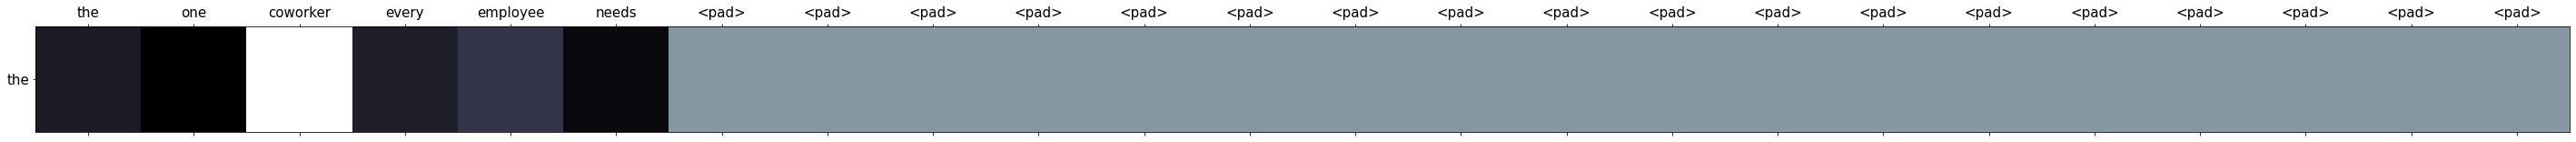

 13%|█▎        | 11/84 [00:00<00:02, 27.59it/s]

netflix to shut down planned louis c.k. comedy special


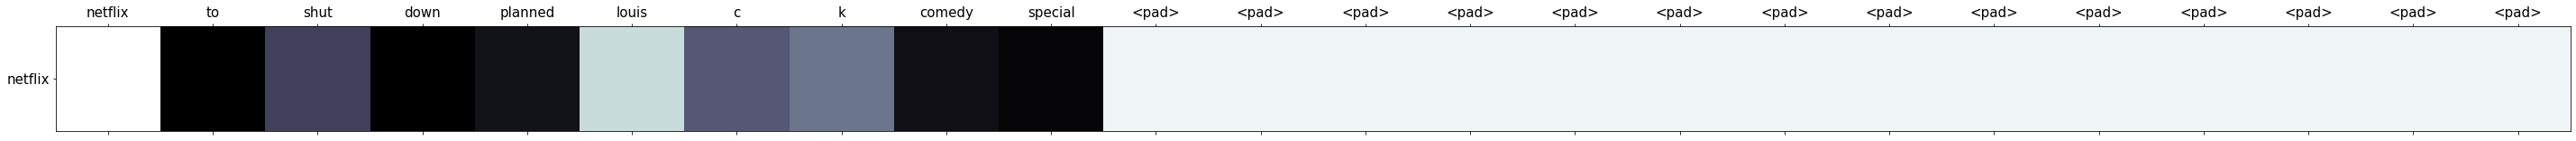

'cool jobs' for baby boomers who want to work in retirement


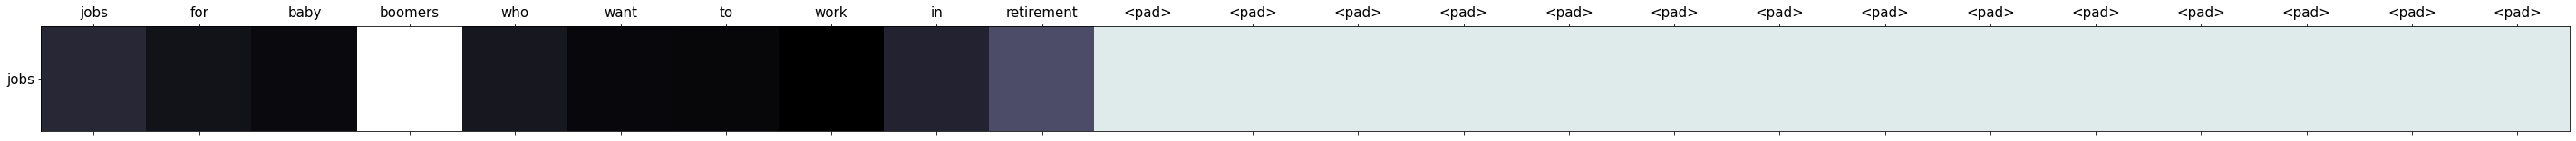

 18%|█▊        | 15/84 [00:01<00:07,  8.94it/s]

younger siblings are good for older siblings' health


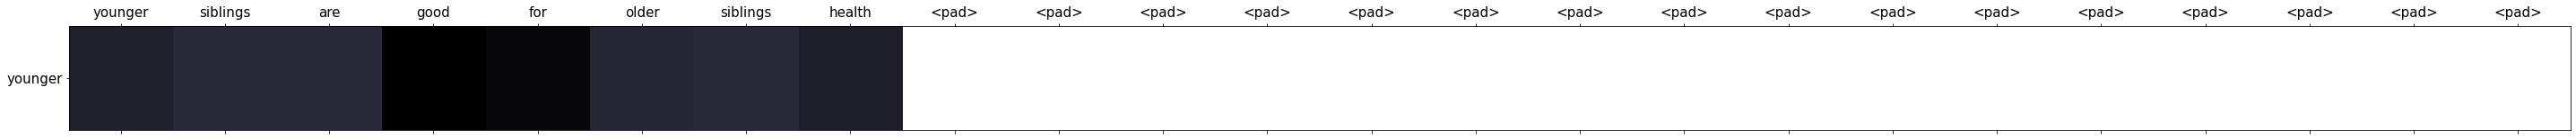

 21%|██▏       | 18/84 [00:01<00:07,  9.25it/s]

fourth graders suspended after plotting to kill teacher with hand sanitizer


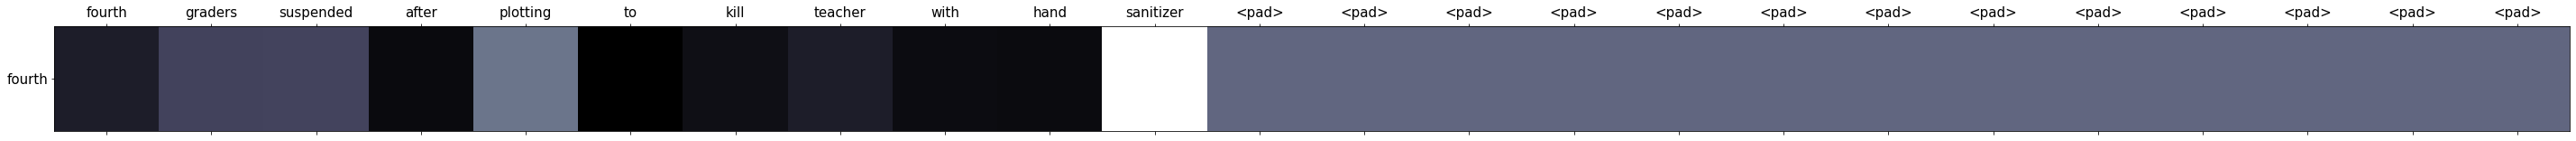

 26%|██▌       | 22/84 [00:02<00:06, 10.09it/s]

travis kalanick takes leaves of absence from post as uber ceo


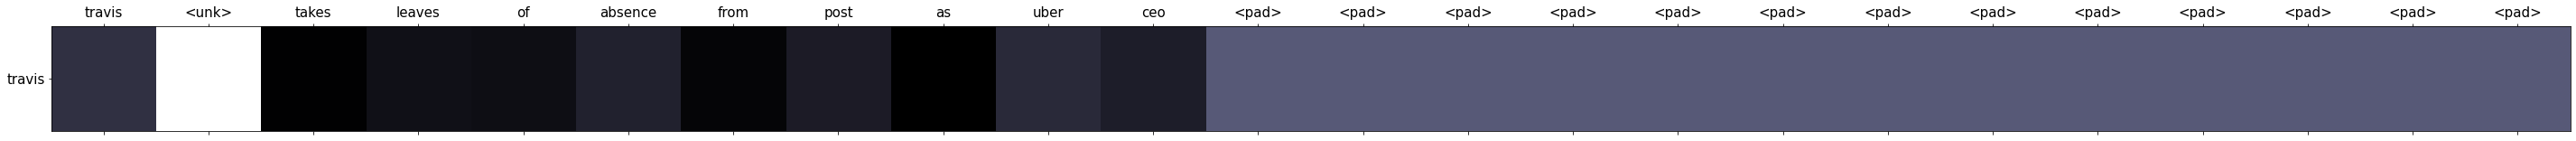

 33%|███▎      | 28/84 [00:02<00:04, 13.05it/s]

damning report claims mexican federal police participated in disappearance of 43 students


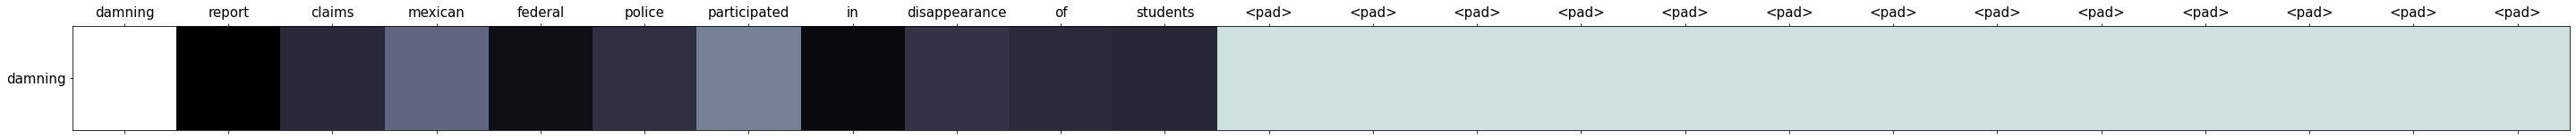

 37%|███▋      | 31/84 [00:02<00:04, 12.24it/s]

4-year search for missing malaysia airlines jet to end next week


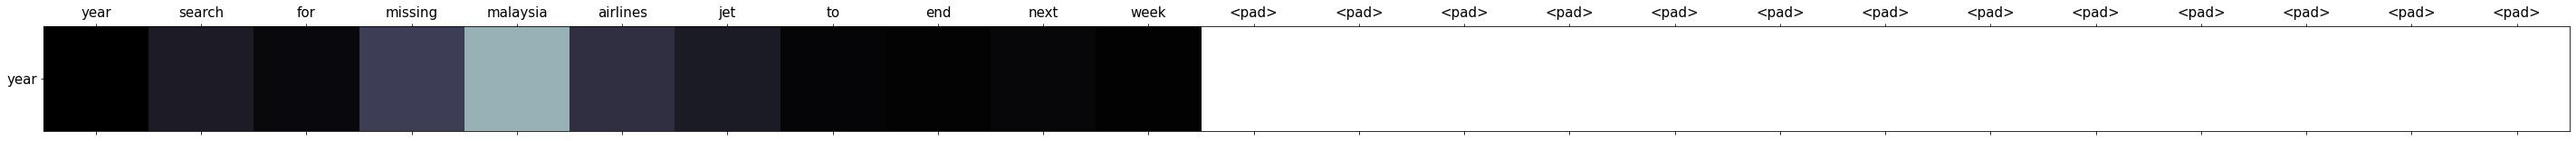

 39%|███▉      | 33/84 [00:02<00:04, 10.81it/s]

staples threatens to fire staff for working more than 25 hours a week


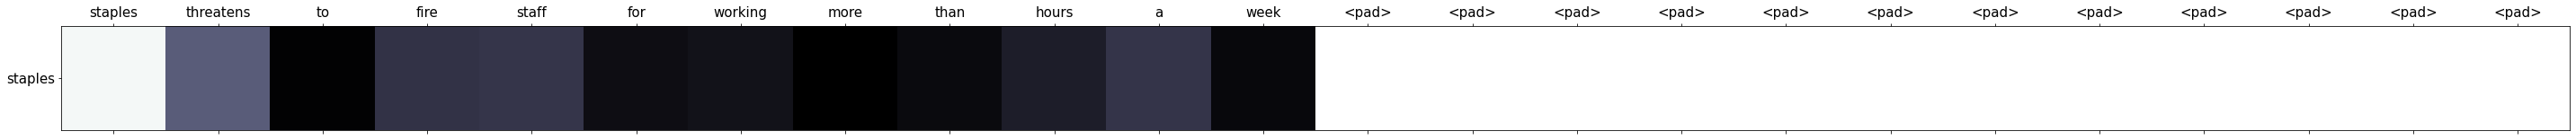

 42%|████▏     | 35/84 [00:03<00:05,  9.54it/s]

danny pintauro clarifies tony danza's 'disappointed' comment: 'he's worried about me more than anything'


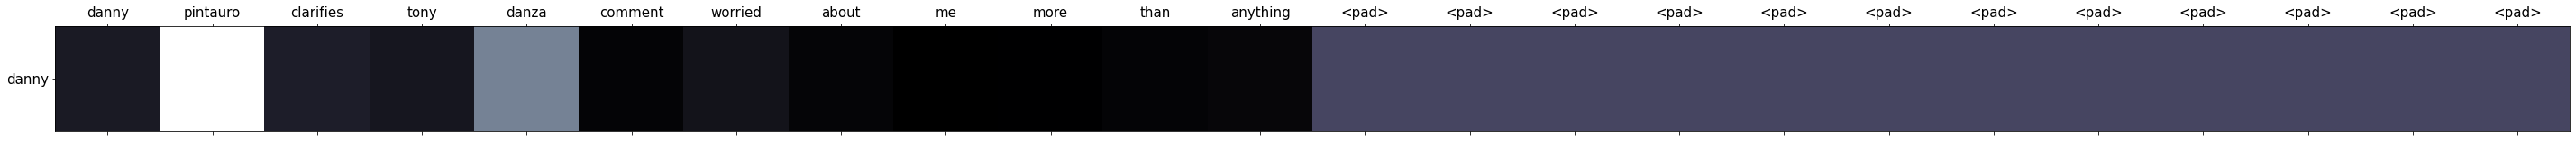

 44%|████▍     | 37/84 [00:03<00:05,  8.72it/s]

clay aiken gained 30 pounds eating bojangles chicken during his campaign


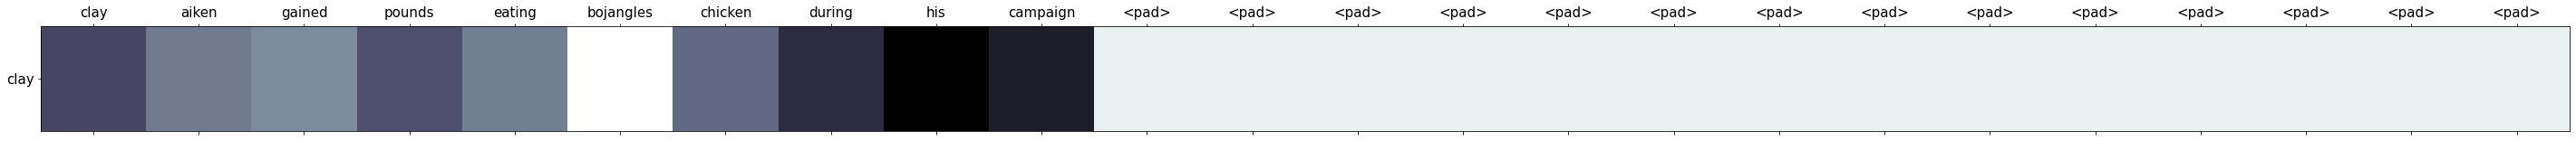

 49%|████▉     | 41/84 [00:03<00:04,  9.48it/s]

chris christie sticks taxpayers with huge bill for official portrait


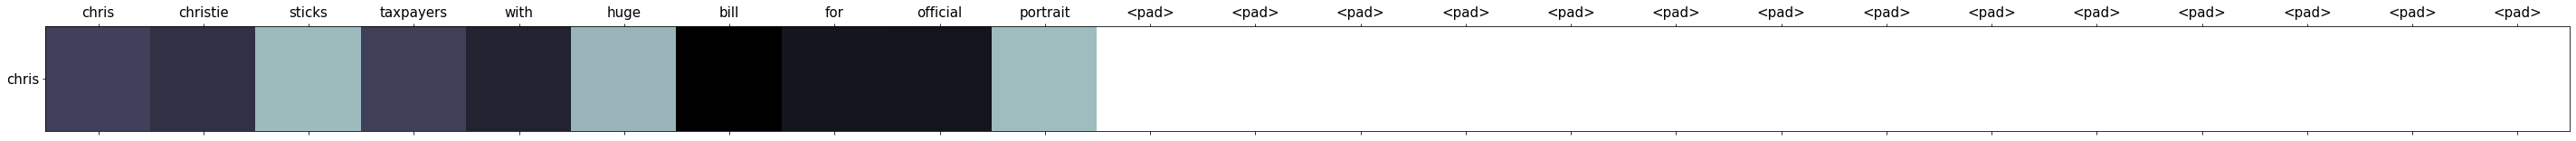

 51%|█████     | 43/84 [00:04<00:04,  8.74it/s]

miami-dade county bans styrofoam from parks, beaches


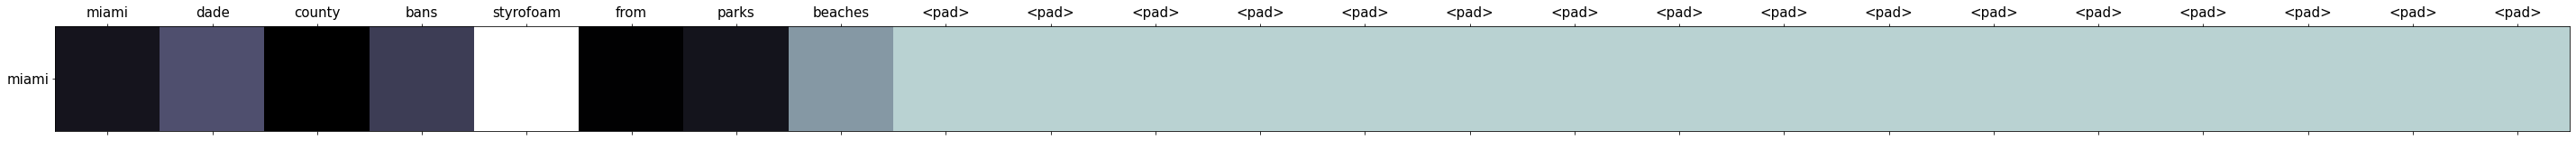

 56%|█████▌    | 47/84 [00:04<00:03,  9.78it/s]

most latinos don't believe they need to be able to do this to be latino


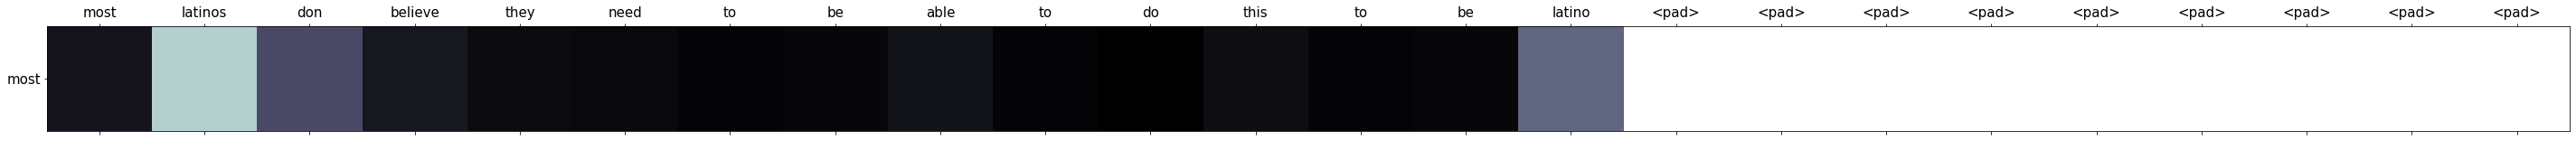

 69%|██████▉   | 58/84 [00:05<00:01, 17.50it/s]

this state just dug deep into voting irregularities. it found nothing close to widespread voter fraud.


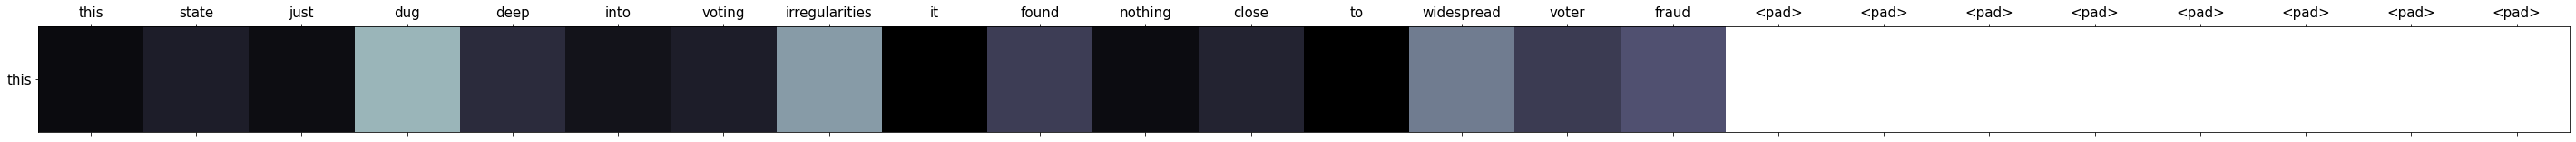

chicago thunderstorm storm kills one person after tent collapses


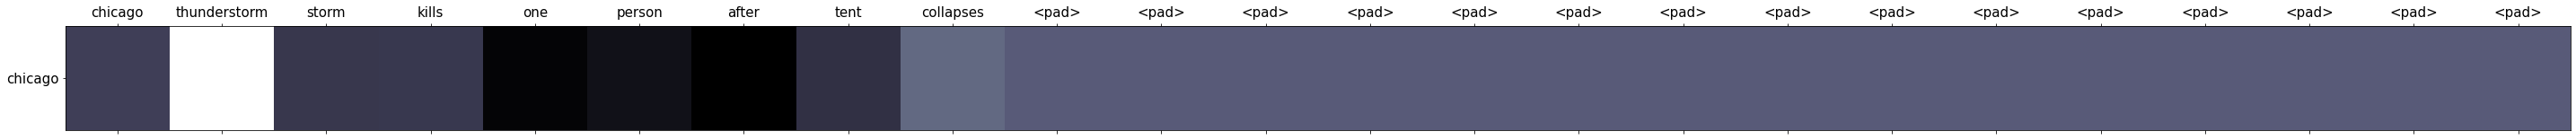

 73%|███████▎  | 61/84 [00:05<00:02, 10.73it/s]

hundreds of thousands on precipice of losing everything, yet no one seems to care?


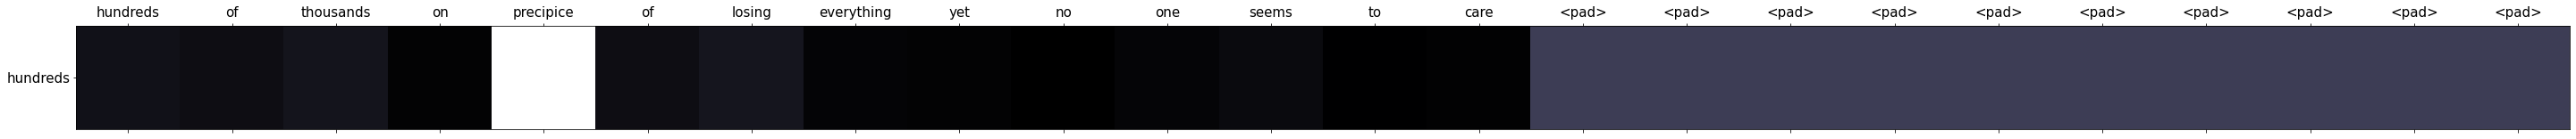

 81%|████████  | 68/84 [00:05<00:01, 14.62it/s]

abc plays 'the wrong song,' cancels 'nashville' after 4 seasons (update)


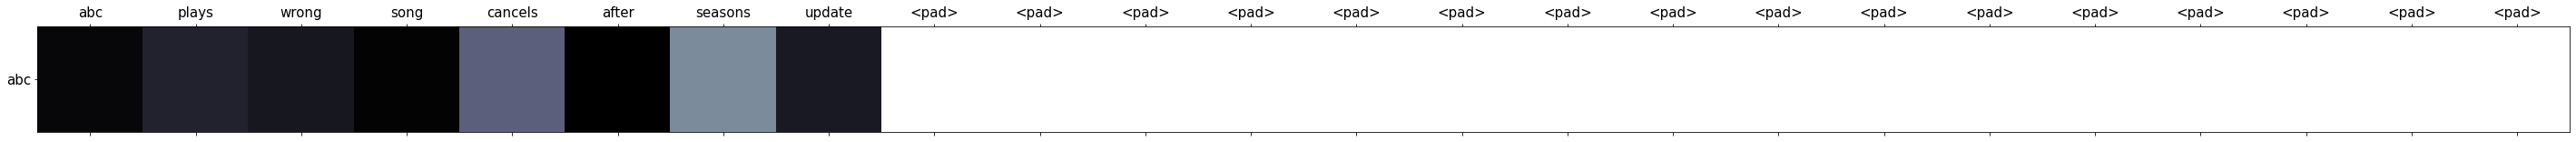

 85%|████████▍ | 71/84 [00:06<00:00, 13.02it/s]

controversial photo-editing app under fire for makeup removal feature


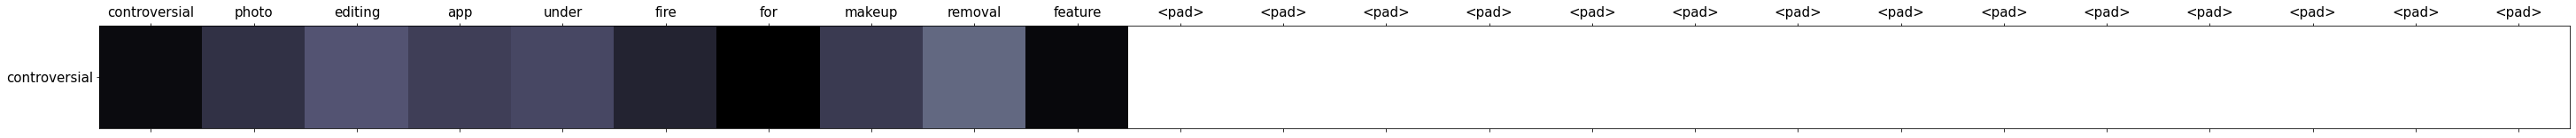

 92%|█████████▏| 77/84 [00:06<00:00, 15.31it/s]

60 years of sound bites to remember


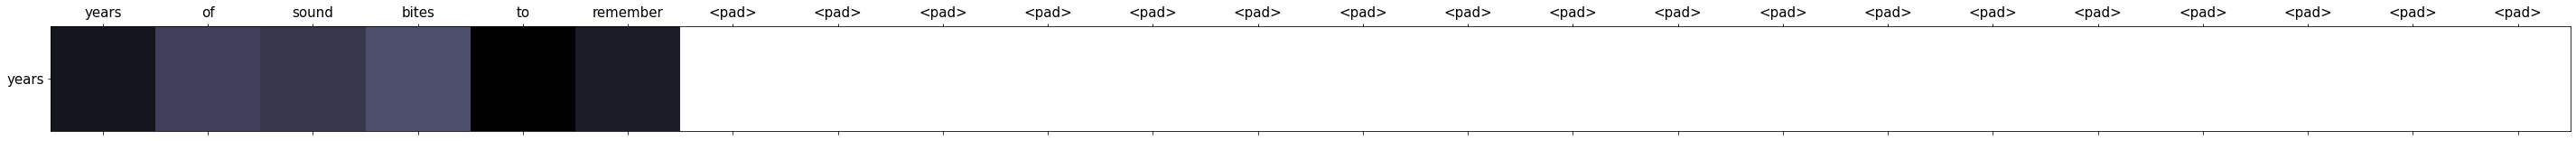

 95%|█████████▌| 80/84 [00:06<00:00, 13.56it/s]

ferguson shop owner 'overwhelmed' by community support after looting


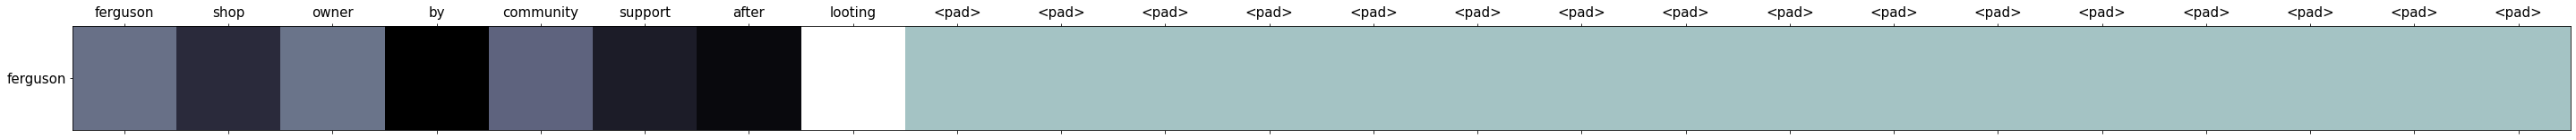

100%|██████████| 84/84 [00:07<00:00, 11.65it/s]


In [ ]:
#@title  { form-width: "1px" }
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

def show_att_plot(tokens, attention, index):
    fig=plt.figure(figsize=(50,50))
    ax=fig.add_subplot(111)
    cax=ax.matshow(attention,cmap='bone')
    ax.tick_params(labelsize=15)
    ax.set_xticklabels([""] + tokens)
    ax.set_yticklabels([""] + tokens)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

def display_attention(test_loader, model):
  model.eval()
  pred_labels = []
  true_labels = []
  for idx, batch_samples in enumerate(tqdm(test_loader)):
    batch_ids, batch_labels, batch_masks, batch_sents = batch_samples

    batch_ids = batch_ids.to(device)
    batch_labels = batch_labels.to(device)

    batch_output, score = model(batch_ids, labels=None, mask=batch_masks, attention_out=True)
    batch_output= batch_output.detach().cpu().numpy()
    score = score.detach().cpu().numpy()
    batch_labels = batch_labels.to('cpu').numpy()
    sent_ids = batch_ids.to('cpu').numpy()
    pred_labels = np.argmax(batch_output, axis=1)
    true_labels = batch_labels

    for i in range(len(batch_samples)):
      if true_labels[i] == 0 and pred_labels[i] == 1:
        print(batch_sents[i])
        att_score = np.mean(score[i], axis=0)
        att_score = [att_score]
        tks = []
        for id in sent_ids[i]:
          tks.append(vocab_npa[id])
        show_att_plot(tks, att_score, i)


display_attention(test_loader, model)

In [ ]:
def predictor(text):
  all_ids = []

  dict_small = {}
  o_text = text[0].split(" ")
  for t in o_text:
    if len(t) > 0:
      index = np.where(vocab_npa==t)[0]
      if len(index) > 0:
        index = index[0]
        dict_small[t] = index


  for sent in text:
    ids = []
    tokens = sent.split(" ")
    for token in tokens:
      if len(token) > 0:
        if token in dict_small:
          index = dict_small[token]
        else:
          index = 1
      else:
         index = 0
      ids.append(index)
    while len(ids) < 24:
      ids.append(0)
    ids = ids[:24]
    all_ids.append(ids)

  results = []
  for tick in range(50):
    batch_len = 100
    batch_masks = np.full((batch_len, 24, 24), True, dtype=bool)
    for i in range(batch_len):
      for j in range(len(all_ids[tick * 100 + i])):
        if (all_ids[tick * 100 + i][j] == 0):
          for k in range(len(ids)):
              batch_masks[i][k][j] = False
              batch_masks[i][j][k] = False
    batch_ids = np.zeros((batch_len, 24))
    for i in range(batch_len):
        cur_len = len(ids)
        batch_ids[i][:cur_len] = ids
    batch_ids = torch.tensor(batch_ids, dtype=torch.long)
    batch_masks = torch.tensor(batch_masks, dtype=torch.bool)

    with torch.no_grad():
      model.eval()
      batch_ids = batch_ids.to(device)
      torch.cuda.empty_cache()
      logits = model(batch_ids, labels=None, mask=batch_masks)
      logits = nn.Softmax(dim=1)(logits[0]).cpu().detach().numpy()
      results.extend(logits)

  results_array = np.array(results)

  return results_array

In [ ]:
from lime.lime_text import LimeTextExplainer

wrong_index = []
for i in range(len(pred_labels)):
  if pred_labels[i] == 0 and true_labels[i] == 1:
    wrong_index.append(i)

text = []
for i in range(len(X_test)):
  if i in wrong_index:
    tmp = ""
    for id in X_test[i][1]:
      if int(id) != 0:
        tmp = tmp + " " + vocab_npa[int(id)]
    text.append(tmp)

label_names = ["not Sarcasm", "Sarcasm"]
explainer = LimeTextExplainer(class_names=label_names, char_level=False)

for i in range(len(text)):
  # print("True label: ", true_labels[wrong_index[i]], "\n", "Predict label: ", pred_labels[wrong_index[i]], "\n")
  exp = explainer.explain_instance(text[i], predictor, num_features=10, top_labels=1)
  exp.show_in_notebook()